# Аугментация. ООП.

Аугментация (от англ. "augment" - "расширять") - это процесс увеличения размера выборки за счет преобразования имеющихся изображений. Например, одним из самых простых способов аугментации является зеркальное отображение картинки. Таким образом, можно из N картинок получить 2\*N изображений. 
Чтобы понять зачем нам это надо, забежим немного вперед: можно сказать, что во время обучения, нейросеть собирает "попиксельную статистику", то есть запоминает как "попиксельно" выглядят кошки, или собаки, или автомобиль. Отображая картинки зеркально, оставляя метку класса нетронутой (ведь зеркально отображенная собака - это же ведь тоже собака), мы увеличиваем вариативность выборки, что позволяет лучше обучить нейросеть. Для лучшего понимания, представьте что все собаки в наборе данных смотрят влево, тогда нейросеть, обучаясь на таких картинках, не сможет распознать собаку, смотрящую вправо. В таком случае, с помощью нехитрого трюка, заключающегося в отзеркаливании картинок, обученная нейросеть будет более робастной (от англ. "robust" - "устойчивый, крепкий"), то есть более устойчивой к выбросам (данным, которые заметно отличаются от остальных). 

Стоит отметить, что в некоторых наборах данных есть очевидные ограничения на список подходящих аугментаций. Например, на картинке с собакой отзеркаленный текст теряет смысл, если для нас важно распознавать текст на изображениях, то такой пример испортит выборку.
<br>
<br>
<tr>
<td><img style="width:40%" alt="Drawing" src="./images/puppy-dog-with-text.jpg" /></td>
<td><img style="transform: scaleX(-1); width:40%" alt="Drawing" src="./images/puppy-dog-with-text.jpg " /></td>
</tr>

## Но сначала: как загрузить картинку?

Сперва познакомимся с двумя наиболее популярными способами чтения изображений. Во вступительной лекции мы узнали, что цветные картинки в компьютере представляются в виде трех матриц (RGB - по одной на каждую компоненту цвета), поэтому фраза "считать картинку" означает представить ее в виде тензора, который будет храниться в переменной языка Python (например, это может быть numpy массив). Рассмотрим эти способы по порядку, импортировав перед этим пакет matplotlib.pyplot (популярное сокращение: plt), который поможет отображать тензор в виде картинки, в привычном для нас виде. 

Строка "%matplotlib inline" - указывает jupyter notebook-у выводить изображения сразу под ячейкой, в которой используется matplotlib (это позволяет нам не писать лишнюю команду plt.show( ) в каждой ячейке, под которой хотим показать картинку).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

### OpenCV

[Open Computer Vision](https://ru.wikipedia.org/wiki/OpenCV) - библиотека алгоритмов компьютерного зрения и обработки изображений, реализованная на языке С/С++ и выпущенная официально в 1999 году группой разработчиков из Intel. Эта библиотека может гораздо больше, чем просто считывать картинки. С ее помощью с изображением можно сделать практически все что придет в голову: искажения, размытие, обрезание, масштабирование и так далее. Нам же пока что потребуется всего одна функция: cv2.imread( ).

In [3]:
import cv2

In [4]:
img = cv2.imread('./images/raccoon.jpg')
print(type(img), img.shape)

<class 'numpy.ndarray'> (400, 640, 3)


Видим, что картинка сразу конвертировалась в numpy.ndarray, а ее размер 400 x 640 x 3 (высота 400 пикселей, ширина 640, глубина цвета 3). Воспользуемся функцией из пакета matplotlib.pyplot, чтобы посмотреть какую картинку мы считали.

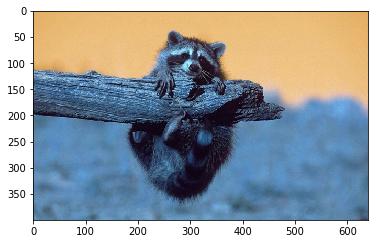

In [5]:
plt.imshow(img)

Енот в позднее время суток при холодном освещении? На самом деле цвета в картинке должны выглядеть иначе. По умолчанию, openCV предполагает, что каналы в картинке расположены в порядке Blue Green Red, поэтому изображение выглядит не естественно. Чтобы конвертировать картинку из BGR в RGB, воспользуемся функцией cv2.cvtColor( ).

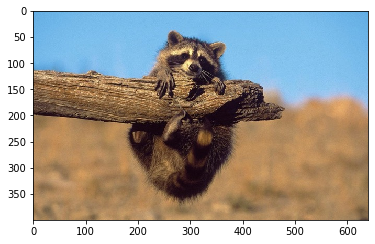

In [9]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
# первый параметр - тензор (картинка)
# второй параметр - код (в данном случае: 4 - cv2.COLOR_BGR2RGB это просто константа равная четырем)

plt.imshow(img)

Вот так выглядит более реалистично. Но также вы могли заметить, что рядом с картинкой присутствует ось X и ось Y. Они не являются частью изображения, их добавила функция plt.imshow( ), так как основное назначение библиотеки matplotlib - рисовать графики, оси являются неотъемлемой частью это библиотеки. Чтобы убрать их, можно вызвать функцию plt.axis( ), передав в виде параметра строку "off".

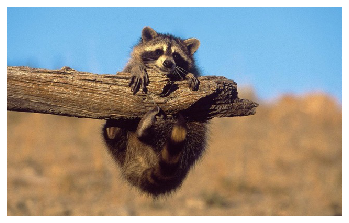

In [14]:
plt.imshow(pil_img) # покажем картинку
plt.axis('off'); # удалим оси

### PIL.Image

Python Image Library (также известная как Pillow) - библиотека для манипуляций с изображениями, появившаяся на свет в далеком 1995 году, реализованная на Python и C. Нам в частности понадобится пакет Image, в котором реализована функция PIL.Image.open( ), считавающая изображение.

In [10]:
import PIL
import numpy as np

In [11]:
pil_img = PIL.Image.open('./images/raccoon.jpg')
print(type(pil_img), img.shape)

<class 'PIL.JpegImagePlugin.JpegImageFile'> (400, 640, 3)


Как можно увидеть, PIL, считывая картинку, не конвертирует ее в numpy.ndarray, а сохраняет в переменную иного, известного только этой библиотеке типа. В отличии от OpenCV, в PIL нет встроенных алгоритмов компьютерного зрения, зато с помощью нее удобнее осуществлять преобразования с картинками. Еще один отличительный плюс PIL.Image изображений заключается в том, что их можно отобразить при помощи встроенной функции display( ), сохраняя исходный размер изображения.

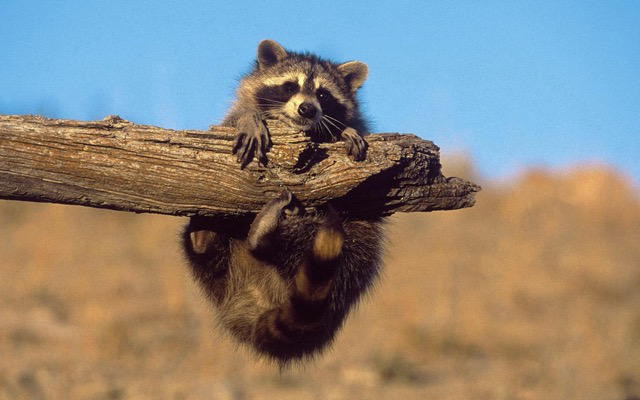

In [12]:
display(pil_img)

Но функция plt.imshow( ) также может принимать PIL картинку, но размер изображения, возможно, придется корректировать самостоятельно.

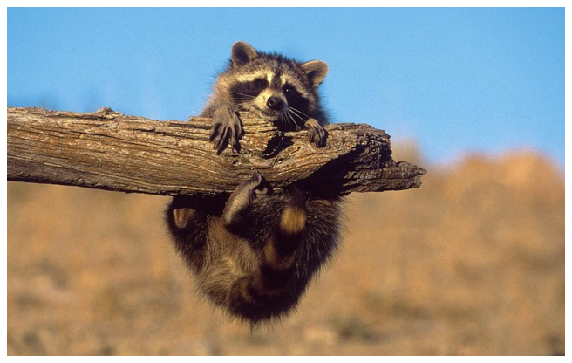

In [16]:
plt.figure(figsize=(10, 16)) # изменим размер графического окна, попробуйте установить другие значения
plt.imshow(pil_img) # покажем картинку
plt.axis('off'); # удалим ось Х и ось У

Конвертировать PIL изображение в numpy.ndarray можно при помощи функции np.asarray( )

In [17]:
img = np.asarray(pil_img)
print(type(img), img.shape)

<class 'numpy.ndarray'> (400, 640, 3)


Теперь картинка представлена в виде numpy.ndarray и с ней можно работать как с математическим объектом. 

Итого:

OpenCV - библиотека, имеющая в своем арсенале функции для манипуляций над картинками, а также алгоритмы компьютерного зрения, которые использовались до того, как стало возможным обучать нейросети на компьютерах.

PIL - приспособлена только для чтения, манипуляций и записи изображений.

#### Задание

Прежде чем мы познакомимся с библиотеками для аугментации, выполните небольшое задание: считайте картинку, которая лежит в рабочей директории в папке images, а имя файла с картинкой: "puppy-dog-with-text.jpg". Отобразите ее при помощи библиотеки matplotlib.pyplot.

In [19]:
# Ваш код здесь

А теперь отобразите картинку (которая на самом деле тензор) зеркально по вертикали и по горизонтали (должна получиться картинка как на примере выше), не используя функции из библиотек.

In [20]:
# Ваш код здесь

---

## Аугментация

Теперь же перейдем к библиотекам, которые используются для аугментации изображений. 

### pytorch transforms

In [ ]:
import torch
from torchvision.transforms import (Compose, RandomAffine, RandomVerticalFlip, ToTensor)

In [ ]:
rotate_aug = RandomAffine(degrees=45, fillcolor=(255, 255, 255))

In [ ]:
auged_img = rotate_aug(pil_img)
plt.imshow(auged_img)

In [ ]:
type(auged_img)

### albumentations
[github репозиторий](https://github.com/albu/albumentations)

In [ ]:
import albumentations as alb

In [ ]:
brightness_aug = alb.RandomBrightness(limit=0.5, always_apply=False, p=1)

In [ ]:
auged_img = brightness_aug(image=img)['image']
plt.imshow(auged_img)

### imgaug
[github репозиторий](https://github.com/aleju/imgaug)

In [ ]:
import imgaug.augmenters as iaa

In [ ]:
coarse_dropout_aug = iaa.CoarseDropout(p=0.5, size_percent=0.5, per_channel=True)

In [ ]:
auged_img = coarse_dropout_aug.augment_image(img)
plt.imshow(auged_img)

---
## ООП

### Синтетический пример

In [ ]:
class Human():

### Свой класс для аугментации
Создадим свой класс для аугментации, который будет включать в себя все три приведенных выше библиотеки и иметь API сходное с torchvision.transforms.

API - (Application Programming Interface - программный интерфейс программирования) это в каком-то смысле синоним слову "протокол". АПИ (как говорят программисты из России) - определяет функционал приложения или класса. Вот как в контексте общения двух программистов используется понятие АПИ:

-(П1): Я хочу чтобы ты написал скрипт, в котором есть функция summ(array), которая принимает на вход список или numpy массив, а на выходе возвращает число, которое является суммой всех элементов

-(П2): Принято, сделаю

In [ ]:
class MyAUG():